In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
!pip install nltk
import nltk

In [2]:
df =pd.read_csv('Reviews.csv')
df = df.head(10000)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...


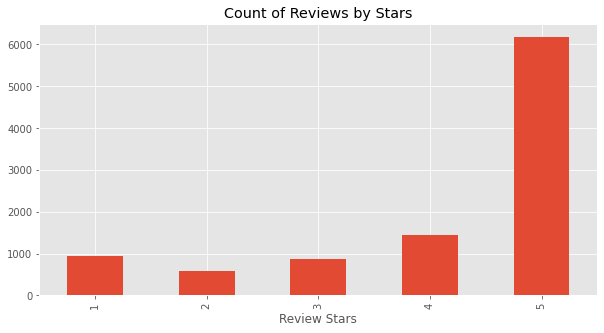

In [5]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

### Basic NLTK 

In [6]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [7]:
print(df.index)

RangeIndex(start=0, stop=10000, step=1)


In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [9]:
nltk.download('averaged_perceptron_tagger')
# https://www.guru99.com/pos-tagging-chunking-nltk.htm
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dev24\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [10]:
# Put tag part of speech into entities 
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\dev24\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dev24\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


### VADER (Valence Aware Dictionary) Sentiment Scoring
### Shows if the sentence is +ve, -ve or neutral
### Stop Words like a, an are removed
### Each word is counted like a score and  combined to a total score

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm #tqdm is like a progress bar

In [12]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dev24\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [14]:
sia.polarity_scores('I am so sad')

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [15]:
# Compound score is the aggregation of all the scores.
# If the compound score is negative, then statement is negative

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 10000/10000 [00:15<00:00, 628.33it/s]


In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [18]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<AxesSubplot:xlabel='Score', ylabel='compound'>

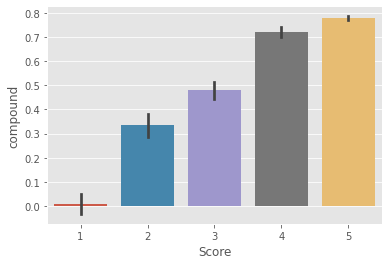

In [19]:
sns.barplot(data=vaders,x='Score',y='compound') 

Text(0.5, 1.0, 'Negative')

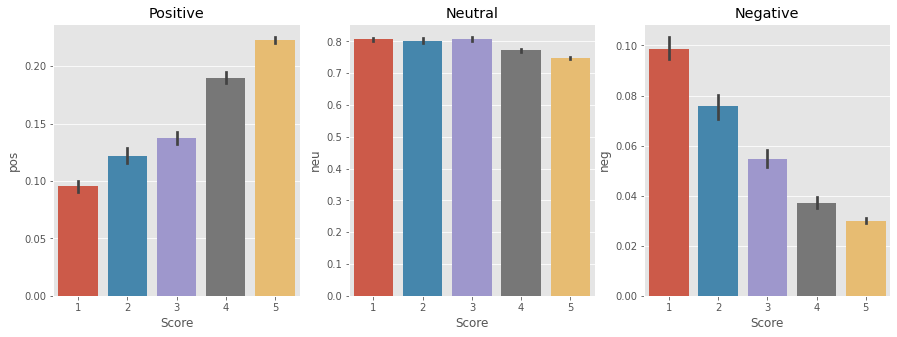

In [20]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

### Roberta Pretrained Model 

In [21]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [22]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [23]:
# Running the same example on Roberta model
encoded_text = tokenizer(example,return_tensors='pt')
output = model(**encoded_text)

In [24]:
scores = output[0][0].detach().numpy() #Converting the tensor output to numpy
# Apply softmax (0 - 1)
scores = softmax(scores)
scores

array([0.9763551 , 0.02068747, 0.00295737], dtype=float32)

In [25]:
scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
}
scores_dict

{'roberta_neg': 0.9763551,
 'roberta_neu': 0.020687474,
 'roberta_pos': 0.0029573701}

In [26]:
# Creating a function which shows the polarity using Roberta Model (if the sentence is -ve, neutral or +ve)
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example,return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
    }
    return scores_dict

In [27]:
# Iterating over whole dataset with Roberta 
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  1%|          | 83/10000 [00:22<1:39:10,  1.67it/s]

Broke for id 83


  2%|▏         | 188/10000 [00:49<26:27,  6.18it/s]  

Broke for id 187


  5%|▌         | 528/10000 [02:25<1:02:41,  2.52it/s]

Broke for id 529


  5%|▌         | 541/10000 [02:28<26:07,  6.03it/s]  

Broke for id 540


  7%|▋         | 745/10000 [03:31<1:11:10,  2.17it/s]

Broke for id 746


  9%|▊         | 864/10000 [04:04<30:34,  4.98it/s]  

Broke for id 863


 11%|█         | 1052/10000 [04:59<1:01:10,  2.44it/s]

Broke for id 1053


 11%|█         | 1071/10000 [05:07<30:36,  4.86it/s]  

Broke for id 1070


 12%|█▏        | 1157/10000 [05:33<25:45,  5.72it/s]  

Broke for id 1156


 13%|█▎        | 1320/10000 [06:17<39:01,  3.71it/s]  

Broke for id 1321


 14%|█▎        | 1374/10000 [06:29<1:22:02,  1.75it/s]

Broke for id 1375


 15%|█▍        | 1497/10000 [07:05<26:20,  5.38it/s]  

Broke for id 1498


 16%|█▌        | 1574/10000 [07:30<1:39:39,  1.41it/s]

Broke for id 1575


 18%|█▊        | 1797/10000 [08:29<17:13,  7.94it/s]  

Broke for id 1796


 18%|█▊        | 1827/10000 [08:38<36:03,  3.78it/s]  

Broke for id 1826


 22%|██▏       | 2168/10000 [10:18<36:41,  3.56it/s]  

Broke for id 2169


 22%|██▏       | 2247/10000 [10:42<27:43,  4.66it/s]  

Broke for id 2248


 25%|██▍       | 2475/10000 [11:40<31:34,  3.97it/s]  

Broke for id 2476


 25%|██▍       | 2493/10000 [11:48<22:00,  5.68it/s]  

Broke for id 2492


 26%|██▌       | 2583/10000 [12:12<30:04,  4.11it/s]

Broke for id 2584


 26%|██▌       | 2609/10000 [12:19<45:48,  2.69it/s]

Broke for id 2610


 29%|██▉       | 2896/10000 [13:38<34:01,  3.48it/s]  

Broke for id 2897
Broke for id 2898


 29%|██▉       | 2901/10000 [13:39<18:12,  6.50it/s]

Broke for id 2902


 29%|██▉       | 2929/10000 [13:47<29:54,  3.94it/s]

Broke for id 2928


 29%|██▉       | 2943/10000 [13:51<39:47,  2.96it/s]  

Broke for id 2942
Broke for id 2944


 29%|██▉       | 2946/10000 [13:52<32:13,  3.65it/s]

Broke for id 2947
Broke for id 2948


 30%|███       | 3023/10000 [14:13<17:07,  6.79it/s]  

Broke for id 3022
Broke for id 3023


 30%|███       | 3024/10000 [14:13<19:20,  6.01it/s]

Broke for id 3025


 33%|███▎      | 3305/10000 [15:26<26:04,  4.28it/s]  

Broke for id 3306


 38%|███▊      | 3789/10000 [17:20<16:59,  6.09it/s]  

Broke for id 3788


 40%|███▉      | 3968/10000 [17:58<16:41,  6.02it/s]

Broke for id 3969


 41%|████      | 4108/10000 [18:38<19:23,  5.06it/s]  

Broke for id 4107


 41%|████      | 4109/10000 [18:38<21:54,  4.48it/s]

Broke for id 4110


 43%|████▎     | 4306/10000 [19:30<27:49,  3.41it/s]

Broke for id 4307


 43%|████▎     | 4315/10000 [19:34<45:27,  2.08it/s]

Broke for id 4316


 44%|████▍     | 4407/10000 [19:56<27:43,  3.36it/s]

Broke for id 4408


 45%|████▍     | 4484/10000 [20:12<11:05,  8.29it/s]

Broke for id 4483


 45%|████▌     | 4511/10000 [20:20<19:16,  4.75it/s]

Broke for id 4512


 46%|████▌     | 4552/10000 [20:33<23:39,  3.84it/s]

Broke for id 4553


 46%|████▌     | 4582/10000 [20:46<50:30,  1.79it/s]  

Broke for id 4583


 50%|█████     | 5039/10000 [22:49<20:30,  4.03it/s]  

Broke for id 5040


 52%|█████▏    | 5181/10000 [23:22<14:37,  5.49it/s]

Broke for id 5182


 52%|█████▏    | 5193/10000 [23:25<19:58,  4.01it/s]

Broke for id 5192


 54%|█████▎    | 5364/10000 [24:04<18:47,  4.11it/s]

Broke for id 5365


 54%|█████▍    | 5442/10000 [24:27<16:44,  4.54it/s]

Broke for id 5442


 57%|█████▋    | 5709/10000 [25:28<09:42,  7.37it/s]

Broke for id 5709


 60%|█████▉    | 5997/10000 [26:40<12:33,  5.31it/s]

Broke for id 5998


 60%|██████    | 6002/10000 [26:42<22:40,  2.94it/s]

Broke for id 6003


 60%|██████    | 6006/10000 [26:43<29:37,  2.25it/s]

Broke for id 6007


 61%|██████    | 6107/10000 [27:07<11:26,  5.67it/s]

Broke for id 6106


 62%|██████▏   | 6235/10000 [27:39<17:43,  3.54it/s]

Broke for id 6234


 66%|██████▌   | 6557/10000 [29:03<26:37,  2.16it/s]

Broke for id 6558


 66%|██████▋   | 6650/10000 [29:35<29:57,  1.86it/s]

Broke for id 6651


 68%|██████▊   | 6799/10000 [30:27<14:09,  3.77it/s]

Broke for id 6798


 68%|██████▊   | 6837/10000 [30:42<22:55,  2.30it/s]

Broke for id 6838


 68%|██████▊   | 6849/10000 [30:47<29:00,  1.81it/s]

Broke for id 6850


 69%|██████▉   | 6887/10000 [31:00<08:06,  6.39it/s]

Broke for id 6886


 69%|██████▉   | 6906/10000 [31:05<16:03,  3.21it/s]

Broke for id 6905


 70%|██████▉   | 6954/10000 [31:21<12:32,  4.05it/s]

Broke for id 6955


 71%|███████   | 7076/10000 [31:49<15:45,  3.09it/s]

Broke for id 7077


 71%|███████   | 7087/10000 [31:52<10:10,  4.77it/s]

Broke for id 7088


 72%|███████▏  | 7202/10000 [32:19<07:11,  6.48it/s]

Broke for id 7201


 76%|███████▌  | 7605/10000 [33:50<07:29,  5.33it/s]

Broke for id 7604


 76%|███████▌  | 7607/10000 [33:51<07:58,  5.00it/s]

Broke for id 7608


 77%|███████▋  | 7672/10000 [34:04<05:58,  6.50it/s]

Broke for id 7671


 77%|███████▋  | 7700/10000 [34:15<13:49,  2.77it/s]

Broke for id 7701


 78%|███████▊  | 7811/10000 [34:41<05:54,  6.17it/s]

Broke for id 7810


 79%|███████▉  | 7908/10000 [35:03<11:05,  3.15it/s]

Broke for id 7907


 81%|████████  | 8076/10000 [35:48<05:40,  5.65it/s]

Broke for id 8077


 81%|████████▏ | 8132/10000 [35:59<04:34,  6.80it/s]

Broke for id 8131


 83%|████████▎ | 8267/10000 [36:31<06:14,  4.63it/s]

Broke for id 8266


 87%|████████▋ | 8739/10000 [38:12<05:59,  3.51it/s]

Broke for id 8740


 88%|████████▊ | 8756/10000 [38:17<03:40,  5.65it/s]

Broke for id 8757


 89%|████████▉ | 8934/10000 [38:58<02:38,  6.71it/s]

Broke for id 8935


 96%|█████████▌| 9589/10000 [41:16<02:30,  2.73it/s]

Broke for id 9590


 99%|█████████▊| 9851/10000 [42:26<00:44,  3.36it/s]

Broke for id 9850


 99%|█████████▉| 9880/10000 [42:31<00:26,  4.46it/s]

Broke for id 9881


 99%|█████████▉| 9911/10000 [42:39<00:28,  3.15it/s]

Broke for id 9910


 99%|█████████▉| 9924/10000 [42:44<00:18,  4.08it/s]

Broke for id 9923


100%|██████████| 10000/10000 [43:04<00:00,  3.87it/s]


In [28]:
vader_result_rename

{'vader_neg': 0.026,
 'vader_neu': 0.811,
 'vader_pos': 0.164,
 'vader_compound': 0.985}

In [29]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [30]:
results_df.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

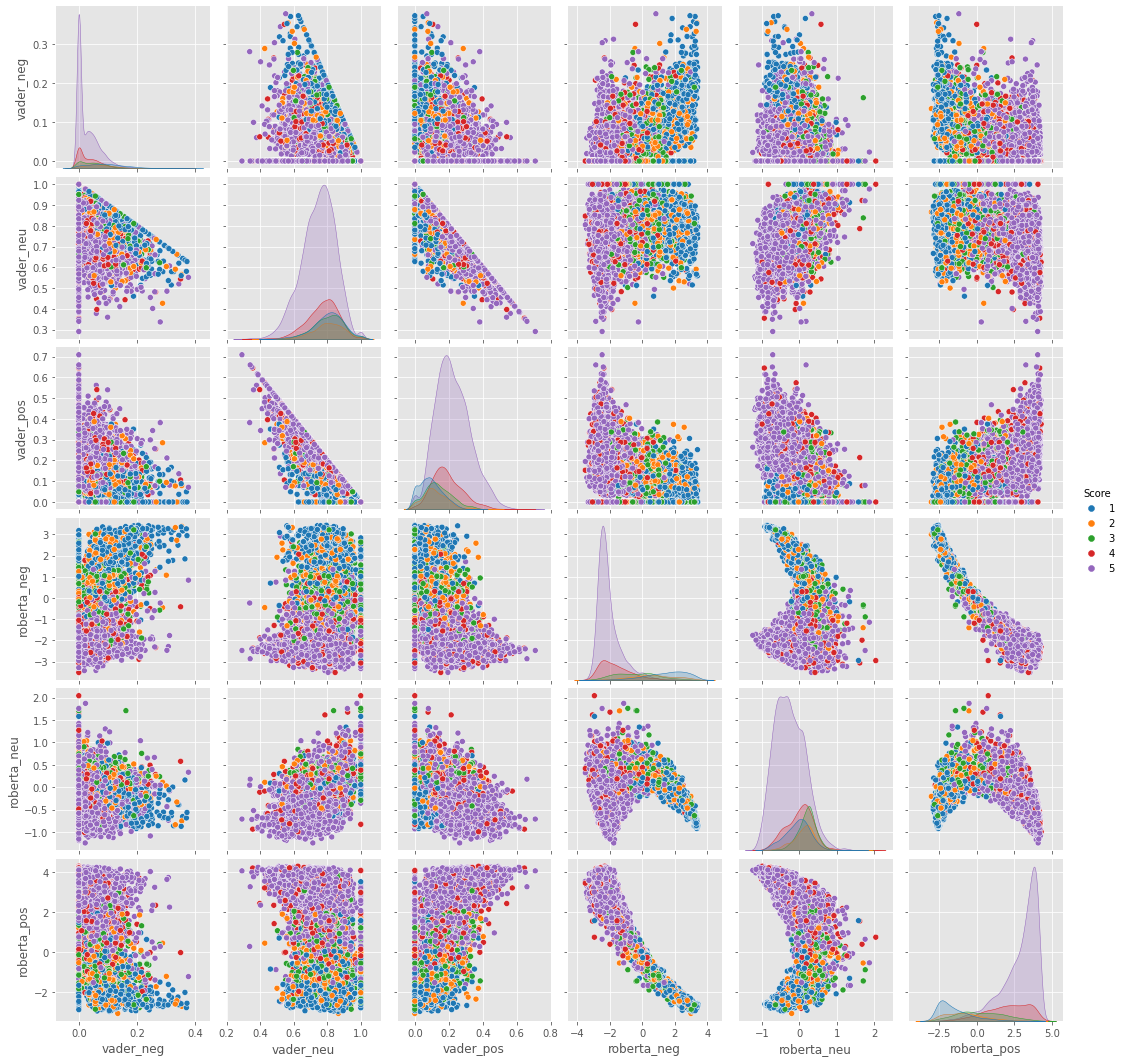

In [31]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [32]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[3
                                                               ]

"My local Walmart and Target both have this, ground or whole bean, at a regular price of less than $9 per 12 oz. bag. It's WAY overpriced here.<br /><br />It is an excellent coffee - I'm drinking it as I write this: an interesting hint of woody, creamy, citrusy taste that's dark but without the burnt aftertaste that comes with many dark roasts."

In [33]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

In [34]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [35]:
!pip install xformers
sent_pipeline('I love sentiment analysis!')


  Using cached xformers-0.0.20-cp39-cp39-win_amd64.whl (97.6 MB)
  Using cached pyre_extensions-0.0.29-py3-none-any.whl (12 kB)


[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [36]:
sent_pipeline('There is something not good about this thing')

[{'label': 'NEGATIVE', 'score': 0.9994971752166748}]

In [37]:
sent_pipeline('Neither negative nor positive')

[{'label': 'NEGATIVE', 'score': 0.8123865127563477}]

In [42]:
sent_pipeline('I dont love myself')

[{'label': 'NEGATIVE', 'score': 0.9977411031723022}]

In [44]:
from transformers import BertForSequenceClassification, BertTokenizer

# Load the pre-trained sentiment analysis model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming you have trained and evaluated your sentiment analysis model and stored it in the 'model' variable

# Save the model and tokenizer
model.save_pretrained('sentiment_analysis')
tokenizer.save_pretrained('sentiment_analysis')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

('sentiment_analysis\\tokenizer_config.json',
 'sentiment_analysis\\special_tokens_map.json',
 'sentiment_analysis\\vocab.txt',
 'sentiment_analysis\\added_tokens.json')

In [45]:
from transformers import BertForSequenceClassification, BertTokenizer

# Load the saved model and tokenizer
model = BertForSequenceClassification.from_pretrained('sentiment_analysis')
tokenizer = BertTokenizer.from_pretrained('sentiment_analysis')

# Use the loaded model and tokenizer for inference


In [46]:
from transformers import pipeline
import joblib

# Create the sentiment analysis pipeline
sent_pipeline = pipeline("sentiment-analysis")

# Save the pipeline as a .pkl file
joblib.dump(sent_pipeline, 'sentiment_analysis.pkl')


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


['sentiment_analysis.pkl']